In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

%run train_model.ipynb
%run deepCNN.ipynb
%run shallowCNN.ipynb
%run EEGNet.ipynb
%run data_handler.ipynb


# combines data and labels for all subjects except for the subject nr given. Returns data, labels
def combine_all_subjects(sub):
    data = None
    labels = None
    for subjectnr in range(1,11):
        if subjectnr is not sub:
            temp_data, temp_desc = load_subject(subjectnr) # Load data, desc
            temp_data, temp_desc = get_innerspeech(temp_data, temp_desc) # Extract only IS trials
            temp_labels = extract_labels(temp_desc) # Pick out labels from description
            if data is None and labels is None:
                data = temp_data
                labels = temp_labels
            else:
                data = np.concatenate((data,temp_data))
                labels = np.concatenate((labels,temp_labels)).astype(int)
    return data, labels



In [2]:
# Will take a subject number and pretrain a model with all data except that subject, then save the model as pretrained_DeepCNN_subjectX.
def pre_train_Deep(sub):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    d, l = combine_all_subjects(sub)
    
    train_data, val_data, test_data, train_labels, val_labels, test_labels = split_data(d,l)
    split_info(train_data, val_data, test_data, train_labels, val_labels, test_labels)
    train_data, val_data, test_data, train_labels, val_labels, test_labels = to_device(train_data, val_data, test_data, train_labels, val_labels, test_labels, device)

    model = DeepCNN(hz = 254, interval = "full", bias = False, dropout = 0.5).float().to(device)

    loss_func = nn.NLLLoss()
    op = optim.Adam(params = model.parameters(), lr = 0.001)
    train_model(model, train_data, train_labels, val_data, val_labels, epochs= 50, batch_size=4, loss_func = loss_func, optimizer=op)
    print(accuracy_check(model, train_data, train_labels))
    print(accuracy_check(model, val_data, val_labels))
    print(accuracy_check(model, test_data, test_labels))
    save_model(model, "pretrained_DeepCNN_subject{0}".format(sub))

# Will take a subject number and pretrain a model with all data except that subject, then save the model as pretrained_ShallowCNN_subjectX.
def pre_train_Shallow(sub):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    d, l = combine_all_subjects(sub)
    
    train_data, val_data, test_data, train_labels, val_labels, test_labels = split_data(d,l)
    split_info(train_data, val_data, test_data, train_labels, val_labels, test_labels)
    train_data, val_data, test_data, train_labels, val_labels, test_labels = to_device(train_data, val_data, test_data, train_labels, val_labels, test_labels, device)

    model = ShallowCNN(hz = 254, interval = "full", bias = True, dropout = 0.001).float().to(device)

    loss_func = nn.NLLLoss()
    op = optim.Adam(params = model.parameters(), lr = 0.001)
    train_model(model, train_data, train_labels, val_data, val_labels, epochs= 50, batch_size=4, loss_func = loss_func, optimizer=op)
    print(accuracy_check(model, train_data, train_labels))
    print(accuracy_check(model, val_data, val_labels))
    print(accuracy_check(model, test_data, test_labels))
    save_model(model, "pretrained_ShallowCNN_subject{0}".format(sub))

# Will take a subject number and pretrain a model with all data except that subject, then save the model as pretrained_EEGNet_subjectX.
def pre_train_EEGNet(sub):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    d, l = combine_all_subjects(sub)
    
    train_data, val_data, test_data, train_labels, val_labels, test_labels = split_data(d,l)
    split_info(train_data, val_data, test_data, train_labels, val_labels, test_labels)
    train_data, val_data, test_data, train_labels, val_labels, test_labels = to_device(train_data, val_data, test_data, train_labels, val_labels, test_labels, device)

    model = EEGNet(hz = 254, interval = "full", bias = False, dropout = 0.5).float().to(device)

    loss_func = nn.NLLLoss()
    op = optim.Adam(params = model.parameters(), lr = 0.001)
    train_model(model, train_data, train_labels, val_data, val_labels, epochs= 50, batch_size=4, loss_func = loss_func, optimizer=op)
    print(accuracy_check(model, train_data, train_labels))
    print(accuracy_check(model, val_data, val_labels))
    print(accuracy_check(model, test_data, test_labels))
    save_model(model, "pretrained_EEGNet_subject{0}".format(sub))

pretraining for subject  1
Split info:
[403, 403, 403, 403] 
 [55, 55, 55, 55] 
 [51, 51, 51, 51]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


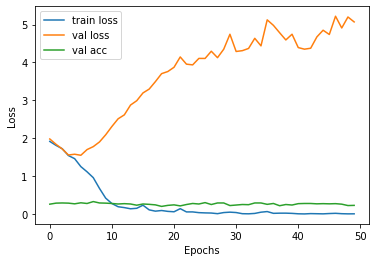

Best model found on epoch:  7
0.6203473945409429
0.32727272727272727
0.2549019607843137
pretraining for subject  2
Split info:
[395, 395, 395, 395] 
 [54, 54, 54, 54] 
 [50, 50, 50, 50]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


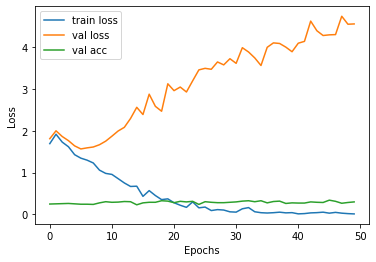

Best model found on epoch:  45
0.990506329113924
0.33796296296296297
0.26
pretraining for subject  3
Split info:
[407, 407, 407, 407] 
 [55, 55, 56, 56] 
 [52, 52, 51, 51]
25.0 %  25.0 %  25.0 %  25.0 % 
24.774774774774773 %  24.774774774774773 %  25.225225225225223 %  25.225225225225223 % 
25.24271844660194 %  25.24271844660194 %  24.75728155339806 %  24.75728155339806 % 


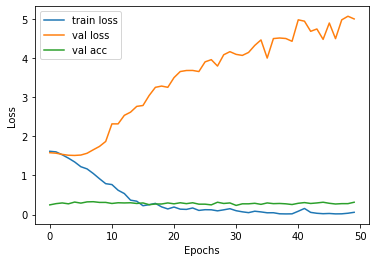

Best model found on epoch:  7
0.5632678132678133
0.32882882882882886
0.22330097087378642
pretraining for subject  4
Split info:
[395, 395, 395, 395] 
 [54, 54, 54, 54] 
 [50, 50, 50, 50]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


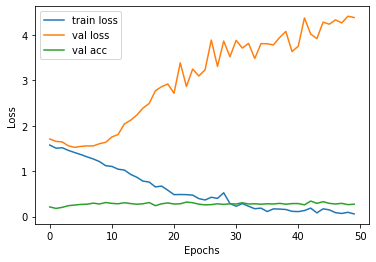

Best model found on epoch:  42
0.9373417721518987
0.3425925925925926
0.305
pretraining for subject  5
Split info:
[395, 395, 395, 395] 
 [54, 54, 54, 54] 
 [50, 50, 50, 50]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


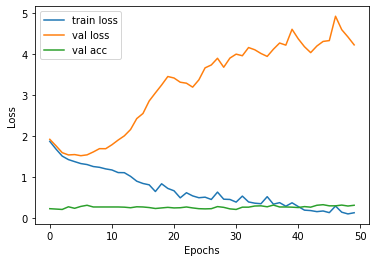

Best model found on epoch:  44
0.9424050632911393
0.3333333333333333
0.28
pretraining for subject  6
Split info:
[399, 400, 400, 400] 
 [55, 54, 55, 55] 
 [51, 51, 50, 50]
24.953095684803 %  25.01563477173233 %  25.01563477173233 %  25.01563477173233 % 
25.11415525114155 %  24.65753424657534 %  25.11415525114155 %  25.11415525114155 % 
25.247524752475247 %  25.247524752475247 %  24.752475247524753 %  24.752475247524753 % 


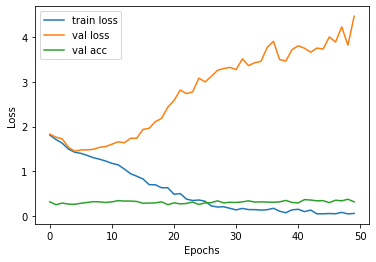

Best model found on epoch:  48
0.9912445278298937
0.3698630136986301
0.29207920792079206
pretraining for subject  7
Split info:
[395, 395, 395, 395] 
 [54, 54, 54, 54] 
 [50, 50, 50, 50]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


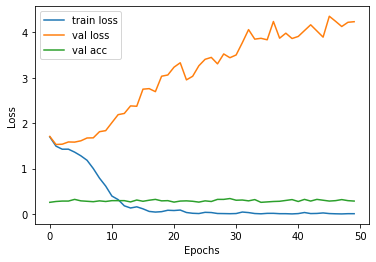

Best model found on epoch:  29
0.9981012658227848
0.3425925925925926
0.3
pretraining for subject  8
Split info:
[403, 403, 403, 403] 
 [55, 55, 55, 55] 
 [51, 51, 51, 51]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


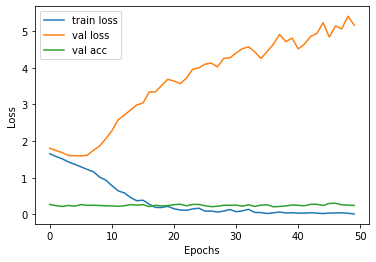

Best model found on epoch:  46
0.9863523573200993
0.30454545454545456
0.2696078431372549
pretraining for subject  9
Split info:
[395, 395, 395, 395] 
 [54, 54, 54, 54] 
 [50, 50, 50, 50]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


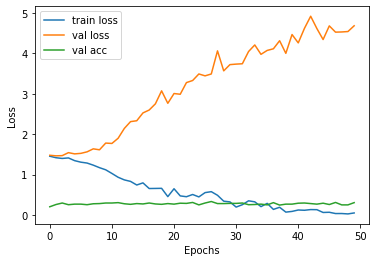

Best model found on epoch:  26
0.8240506329113924
0.3333333333333333
0.315
pretraining for subject  10
Split info:
[395, 395, 395, 395] 
 [54, 54, 54, 54] 
 [50, 50, 50, 50]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


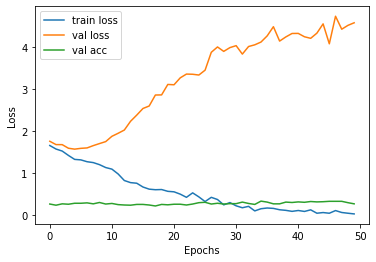

Best model found on epoch:  34
0.9468354430379747
0.32407407407407407
0.33


In [3]:
for i in range(1,11):
    print("pretraining for subject ", i)
    pre_train_Deep(i)


In [ ]:
for i in range(1,11):
    pre_train_Shallow(i)

In [ ]:
for i in range(1,11):
    pre_train_EEGNet(i)